In [24]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
import os
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import f1_score
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


Epoch 1/10


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=[0 1 2 3], y=[1 0 0 ... 0 0 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


3874/3874 [==============================] - 198s 50ms/step - loss: 0.2350 - accuracy: 0.8634
Epoch 2/10
3874/3874 [==============================] - 194s 50ms/step - loss: 0.1857 - accuracy: 0.8949
Epoch 3/10
3874/3874 [==============================] - 193s 50ms/step - loss: 0.1765 - accuracy: 0.9004
Epoch 4/10
3874/3874 [==============================] - 190s 49ms/step - loss: 0.1704 - accuracy: 0.9035
Epoch 5/10
3874/3874 [==============================] - 189s 49ms/step - loss: 0.1660 - accuracy: 0.9052
Epoch 6/10
3874/3874 [==============================] - 189s 49ms/step - loss: 0.1632 - accuracy: 0.9064
Epoch 7/10
3874/3874 [==============================] - 185s 48ms/step - loss: 0.1606 - accuracy: 0.9074
Epoch 8/10
3874/3874 [==============================] - 185s 48ms/step - loss: 0.1585 - accuracy: 0.9077
Epoch 9/10
3874/3874 [==============================] - 185s 48ms/step - loss: 0.1563 - accuracy: 0.9090
Epoch 10/10
3874/3874 [==============================] - 186s 48ms

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=[0 1 2 3], y=[0 0 0 ... 0 0 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


65/65 [==============================] - 8s 51ms/step - loss: 0.7711 - accuracy: 0.5107
Epoch 2/10
65/65 [==============================] - 3s 48ms/step - loss: 0.4610 - accuracy: 0.8247
Epoch 3/10
65/65 [==============================] - 3s 48ms/step - loss: 0.3598 - accuracy: 0.8485
Epoch 4/10
65/65 [==============================] - 3s 49ms/step - loss: 0.3060 - accuracy: 0.8551
Epoch 5/10
65/65 [==============================] - 3s 48ms/step - loss: 0.2917 - accuracy: 0.8670
Epoch 6/10
65/65 [==============================] - 3s 48ms/step - loss: 0.3221 - accuracy: 0.8507
Epoch 7/10
65/65 [==============================] - 3s 48ms/step - loss: 0.2820 - accuracy: 0.8539
Epoch 8/10
65/65 [==============================] - 3s 47ms/step - loss: 0.2702 - accuracy: 0.8652
Epoch 9/10
65/65 [==============================] - 3s 48ms/step - loss: 0.2634 - accuracy: 0.8711
Epoch 10/10
65/65 [==============================] - 3s 49ms/step - loss: 0.2552 - accuracy: 0.8594


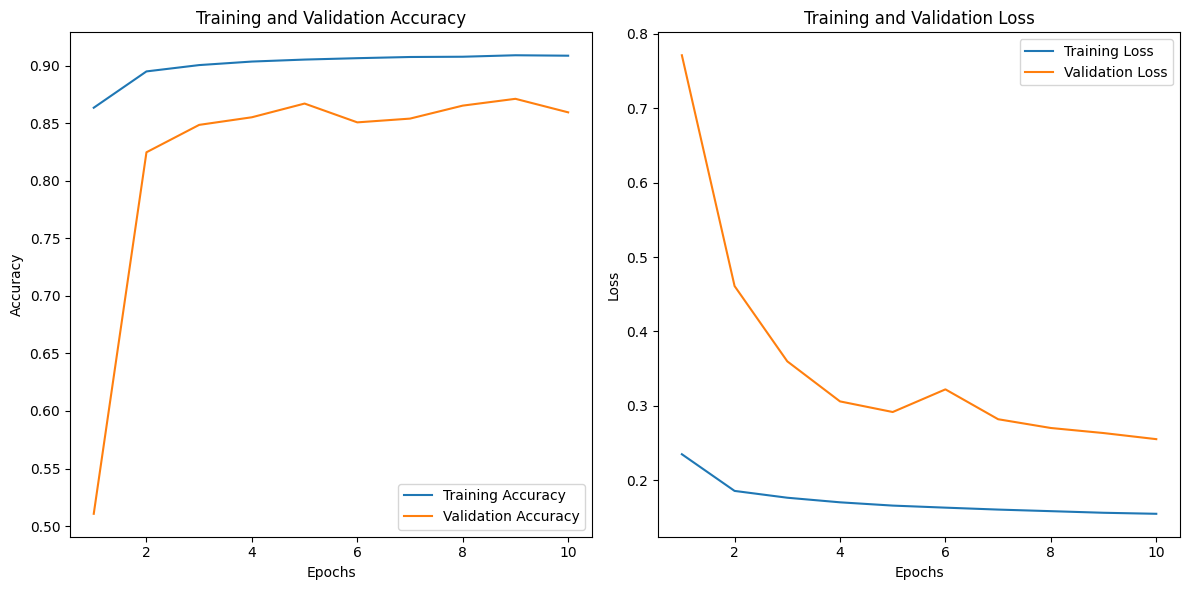

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=[0 1 2 3], y=[0 1 1 ... 0 1 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


3765/3765 [==============================] - 28s 7ms/step - loss: 1.3903 - accuracy: 0.0803
Final accuracy on the test dataset: 0.08026567101478577
Final loss on the test dataset: 1.3903166055679321
3765/3765 [==============================] - 26s 7ms/step
F1 Score: 0.10622110765437151


(None, None)

In [23]:
def process_folder(folder_path, is_test=False):
    X_batches = []
    y_batches = []

    for root, dirs, files in os.walk(folder_path):
        for subfolder in dirs:
            subfolder_path = os.path.join(root, subfolder)
            file_paths = [os.path.join(subfolder_path, filename) for filename in os.listdir(subfolder_path) if filename.endswith(".csv")]
            if file_paths:
                for file_path in file_paths:
                    if os.path.basename(file_path) == "dates.csv":
                        print("Skipping file:", file_path)
                        continue

                    X, y = load_and_preprocess_data(file_path)
                    X_batches.append(X)
                    y_batches.append(y)

    if X_batches:
        X_data = np.concatenate(X_batches)
        y_data = np.concatenate(y_batches)

        # Define the LSTM model
        inputs = Input(shape=(X_data.shape[1], X_data.shape[2]))
        lstm_layer1 = LSTM(units=128, return_sequences=True)(inputs)  # Increased units for more capacity
        dropout1 = Dropout(0.5)(lstm_layer1)
        lstm_layer2 = LSTM(units=128, return_sequences=True)(dropout1)
        dropout2 = Dropout(0.5)(lstm_layer2)
        lstm_layer3 = LSTM(units=128)(dropout2)
        dropout3 = Dropout(0.5)(lstm_layer3)
        outputs = Dense(4, activation='softmax')(dropout3)
        model = Model(inputs=inputs, outputs=outputs)

        # Compile the model
        optimizer = Adam(learning_rate=0.001)
        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

        # One-hot encode the target data
        y_data_encoded = to_categorical(y_data)

        # Compute class weights
        class_weights = compute_class_weight('balanced', np.unique(y_data), y_data)
        class_weight = {i: class_weights[i] for i in range(len(class_weights))}

        # Train the model
        if not is_test:
            history = model.fit(X_data, y_data_encoded, epochs=10, batch_size=200, verbose=1, class_weight=class_weight)
        else:
            test_loss, test_accuracy = model.evaluate(X_data, y_data_encoded)
            print("Final accuracy on the test dataset:", test_accuracy)
            print("Final loss on the test dataset:", test_loss)

            # Calculate F1 score
            y_pred = model.predict(X_data)
            y_pred_classes = np.argmax(y_pred, axis=1)
            f1 = f1_score(y_data, y_pred_classes, average='macro')
            print("F1 Score:", f1)

            return None, None

        # Return training accuracy and loss
        if not is_test:
            train_accuracy = history.history['accuracy']
            train_loss = history.history['loss']
            return train_accuracy, train_loss

# Define paths for the training, validation, and test datasets
train_folder_path = "/workspace/awadh/nvidia/Vaibhav/Satellite_TSS2/CropWiseSimplified/3/train"
validate_folder_path = "/workspace/awadh/nvidia/Vaibhav/Satellite_TSS2/CropWiseSimplified/3/valid"
test_folder_path = "/workspace/awadh/nvidia/Vaibhav/Satellite_TSS2/CropWiseSimplified/3/test"

# Process the training dataset
train_accuracy, train_loss = process_folder(train_folder_path)

# Process the validation dataset (no need for validation split)
val_accuracy, val_loss = process_folder(validate_folder_path)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
if train_accuracy:
    plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
if val_accuracy:
    plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
if train_loss:
    plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
if val_loss:
    plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Process the test dataset
process_folder(test_folder_path, is_test=True)
